In [1]:
#!/usr/bin/python

# Import required modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mpltkr
import matplotlib.colors as mplcolors
import matplotlib.patches as mplpatches
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Import COSMO style toolkit
import cosmoplot.colorbars as cosmocbars
import cosmoplot.style as cosmostyle
import cosmoplot.utils as cosmoutils

cosmostyle.set_style('article')
colorList = cosmostyle.color_cycle

In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/helfrech/.config/matplotlib/stylelib/cosmoLarge.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
/home/helfrech/ENVIRONMENTS/ZEOLITES/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


In [2]:
# Custom datatype for loading histograms
dt = np.dtype({'names': ['bin_edges', 'dx', 'probability_density'], 
               'formats': ['f8', 'f8', 'f8']})

# Functions

In [17]:
# Load unique DEEM and IZA histograms, 3.5 A SOAP cutoff

def make_histogram(dist_data, min_dist_data, cutoff, plot_type='histogram', output='./histogram.pdf'):
    """
        Make histograms of distances and minimum distances
        
        ---Arguments---
        dist_data: data to plot on the distance histogram as a dictonary
            with the key as the label and the data as a dictionary
            (bin_edges, dx, probability density)
        min_dist_data: data to plot on the minimum distance histogram
            as a dictonary with the key as the label and the data as a dictionary
            (bin_edges, dx, probability density)
        cutoff: cutoff label for the histogram
        
        ---Returns---
        fig: figure object for tweaking/saving
        axes: tuple of axes (distance, min_distance) for tweaking/saving
    """
    
    # Initialize figure
    fig = plt.figure(figsize=(3.54, 3.54))
    axs_min_dist = fig.add_subplot(2, 1, 2)
    axs_dist = fig.add_subplot(2, 1, 1, sharex=axs_min_dist)

    # Set ylabel
    for i in (axs_dist, axs_min_dist):
        i.set_ylabel('Prob. Density')
    
    # Unset top xticklabels
    axs_dist.tick_params(axis='x', which='both', labelbottom=False)

    # Set scales
    axs_min_dist.set_xlabel('Distance')
    axs_min_dist.set_xscale('log')
    #axs_min_dist.set_yscale('log')
    axs_dist.set_xscale('log')
    #axs_dist.set_yscale('log')
    
    # Plot histograms
    for key, value in dist_data.items():
        
        # Load data
        bin_edges = value['bin_edges']
        dx = value['dx']
        probability_density = value['probability_density']
        
        # Plot bar
        if plot_type == 'histogram':
            axs_dist.bar(bin_edges, probability_density, width=dx, align='edge',
                         label=key, alpha=0.5, linewidth=0.5)
        
        # Plot KDE
        elif plot_type == 'kde':
            axs_dist.plot(bin_edges, probability_density, label=key)
    
    # Plot minimum distance histograms
    for key, value in min_dist_data.items():
        
        # Load data
        bin_edges = value['bin_edges']
        dx = value['dx']
        probability_density = value['probability_density']
        
        # Plot bar
        if plot_type == 'histogram':
            axs_min_dist.bar(bin_edges, probability_density, width=dx, align='edge',
                             label=key, alpha=0.5)
            
        # Plot KDE
        elif plot_type == 'kde':
            axs_min_dist.plot(bin_edges, probability_density, label=key)
        
    # Plot labels
    text_pos = (1.05, 0.00)
    text_params = dict(horizontalalignment='left', verticalalignment='bottom',
                       fontsize='medium')
        
    axs_dist.text(*text_pos, f'{cutoff} \u00c5,\nDistance', 
                  **text_params, 
                  transform=axs_dist.transAxes)
    
    axs_min_dist.text(*text_pos, f'{cutoff} \u00c5,\nMin. Distance', 
                      **text_params, 
                      transform=axs_min_dist.transAxes)
      
    # Legend
    legend_params = dict(frameon=False, loc='upper left', bbox_to_anchor=(1.0, 1.05))
    
    axs_dist.legend(**legend_params)
    axs_min_dist.legend(**legend_params)
    
    fig.subplots_adjust(hspace=0.1)
    
    #fig.savefig(output, bbox_inches='tight')
    #outputpng = os.path.splitext(output)[0]
    #fig.savefig(outputpng+'.png', bbox_inches='tight')

    return fig, (axs_dist, axs_min_dist)

In [18]:
cutoff = '6.0'
data_dir = f'../../Processed_Data/Histograms/{cutoff}'
plot_type = 'kde'

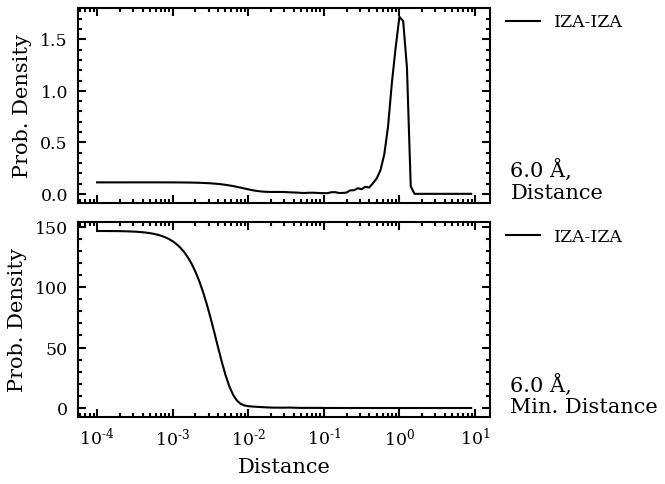

In [19]:
# Load data
#deem_deem = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_{plot_type}.dat', dtype=dt)
iza_iza = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_{plot_type}.dat', dtype=dt)
#iza_deem = np.loadtxt(f'{data_dir}/IZA_226-DEEM_10k_{plot_type}.dat', dtype=dt)

#deem_deem_min = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_min_{plot_type}.dat', dtype=dt)
iza_iza_min = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_min_{plot_type}.dat', dtype=dt)
#deem_iza_min = np.loadtxt(f'{data_dir}/DEEM_10k-IZA_226_min_{plot_type}.dat', dtype=dt)
#iza_deem_min = np.loadtxt(f'{data_dir}/IZA_226-DEEM_10k_min_{plot_type}.dat', dtype=dt)

# Collect data
#dist_data = dict([('DEEM-DEEM', deem_deem),
#                  ('IZA-IZA', iza_iza),
#                  ('DEEM-IZA', iza_deem)])

#min_dist_data = dict([('DEEM-DEEM', deem_deem_min),
#                      ('IZA-IZA', iza_iza_min),
#                      ('DEEM-IZA', deem_iza_min),
#                      ('IZA-DEEM', iza_deem_min)])

dist_data = dict([('IZA-IZA', iza_iza)])
min_dist_data = dict([('IZA-IZA', iza_iza_min)])

# Plot
make_histogram(dist_data, min_dist_data, cutoff, plot_type,
               output=f'../../Results/{cutoff}/IZA_226-DEEM_10k_{plot_type}.pdf')

plt.show()

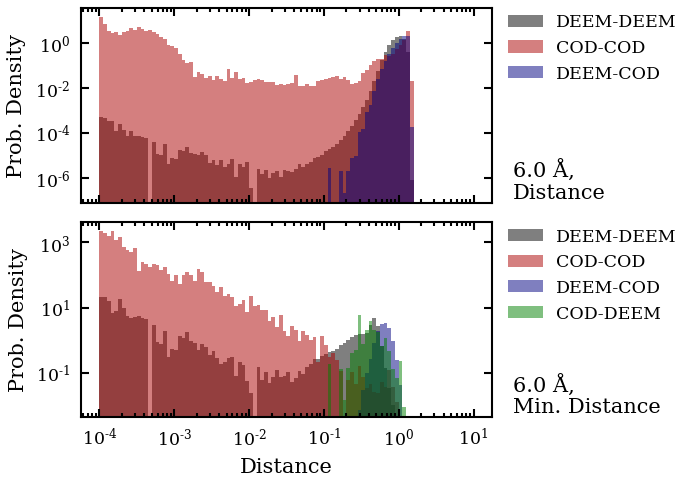

In [94]:
# Load data
deem_deem = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_{plot_type}.dat', dtype=dt)
cod_cod = np.loadtxt(f'{data_dir}/COD_196-COD_196_{plot_type}.dat', dtype=dt)
cod_deem = np.loadtxt(f'{data_dir}/COD_196-DEEM_10k_{plot_type}.dat', dtype=dt)

deem_deem_min = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_min_{plot_type}.dat', dtype=dt)
cod_cod_min = np.loadtxt(f'{data_dir}/COD_196-COD_196_min_{plot_type}.dat', dtype=dt)
deem_cod_min = np.loadtxt(f'{data_dir}/DEEM_10k-COD_196_min_{plot_type}.dat', dtype=dt)
cod_deem_min = np.loadtxt(f'{data_dir}/COD_196-DEEM_10k_min_{plot_type}.dat', dtype=dt)

# Collect data
dist_data = dict([('DEEM-DEEM', deem_deem),
                  ('COD-COD', cod_cod),
                  ('DEEM-COD', cod_deem)])

min_dist_data = dict([('DEEM-DEEM', deem_deem_min),
                      ('COD-COD', cod_cod_min),
                      ('DEEM-COD', deem_cod_min),
                      ('COD-DEEM', cod_deem_min)])

# Plot
make_histogram(dist_data, min_dist_data, cutoff, plot_type,
               output=f'../../Results/{cutoff}/COD_196-DEEM_10k_{plot_type}.pdf')

plt.show()

In [95]:
# Load IZA cantons
iza_cantons = np.loadtxt('../../Raw_Data/GULP/IZA_226/cantons.txt', 
                         dtype={'names': ['structures', 'cantons'], 'formats': ['U3', 'i8']})
canton_labels = np.unique(iza_cantons['cantons'])
print(canton_labels)

[1 2 3 4]


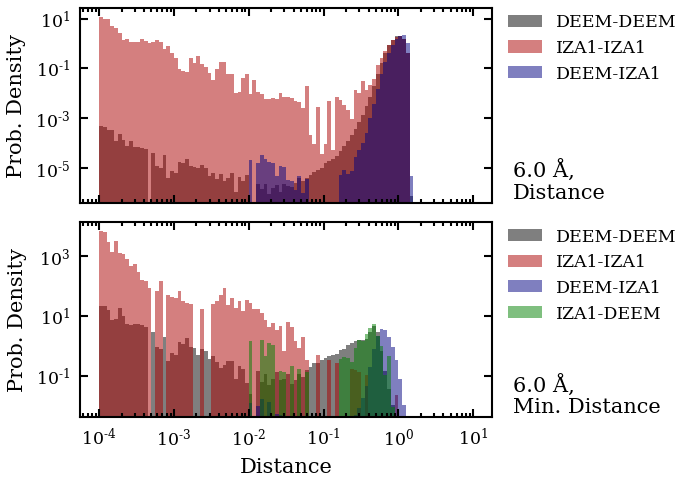

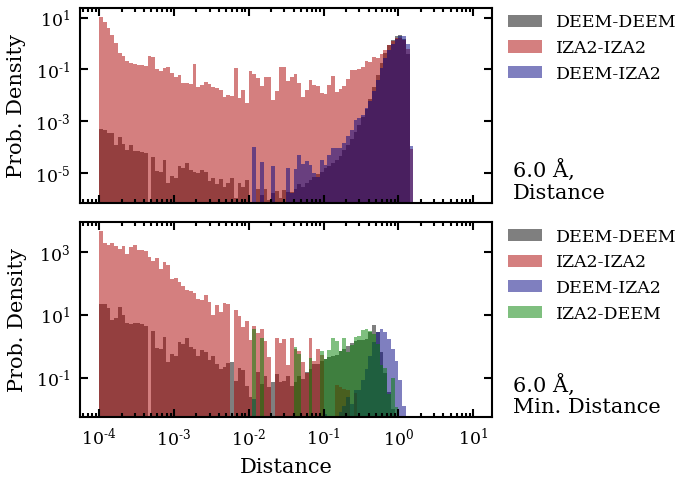

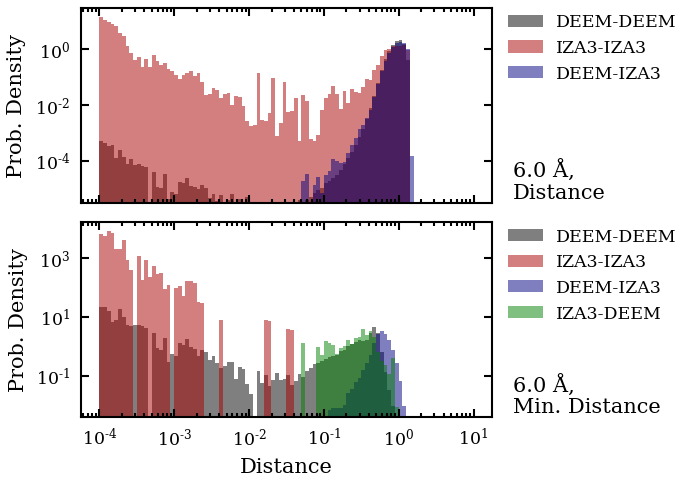

In [96]:
# Load DEEM only data
deem_deem = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_{plot_type}.dat', dtype=dt)
deem_deem_min = np.loadtxt(f'{data_dir}/DEEM_10k-DEEM_10k_min_{plot_type}.dat', dtype=dt)

# Skip canton 4 (RWY) since self-{plot_type} is empty
cantons = np.delete(canton_labels, 3)
for canton in cantons:
    
    # Load IZA data
    iza_iza = np.loadtxt(f'{data_dir}/IZA_226_{canton}-IZA_226_{canton}_{plot_type}.dat', dtype=dt)
    iza_deem = np.loadtxt(f'{data_dir}/IZA_226_{canton}-DEEM_10k_{plot_type}.dat', dtype=dt)

    iza_iza_min = np.loadtxt(f'{data_dir}/IZA_226_{canton}-IZA_226_{canton}_min_{plot_type}.dat', dtype=dt)
    deem_iza_min = np.loadtxt(f'{data_dir}/DEEM_10k-IZA_226_{canton}_min_{plot_type}.dat', dtype=dt)
    iza_deem_min = np.loadtxt(f'{data_dir}/IZA_226_{canton}-DEEM_10k_min_{plot_type}.dat', dtype=dt)

    # Collect data
    dist_data = dict([('DEEM-DEEM', deem_deem),
                      (f'IZA{canton}-IZA{canton}', iza_iza),
                      (f'DEEM-IZA{canton}', iza_deem)])

    min_dist_data = dict([('DEEM-DEEM', deem_deem_min),
                          (f'IZA{canton}-IZA{canton}', iza_iza_min),
                          (f'DEEM-IZA{canton}', deem_iza_min),
                          (f'IZA{canton}-DEEM', iza_deem_min)])

    # Plot
    make_histogram(dist_data, min_dist_data, cutoff, plot_type,
                   output=f'../../Results/{cutoff}/IZA_226_{canton}-DEEM_10k_{plot_type}.pdf')

    plt.show()

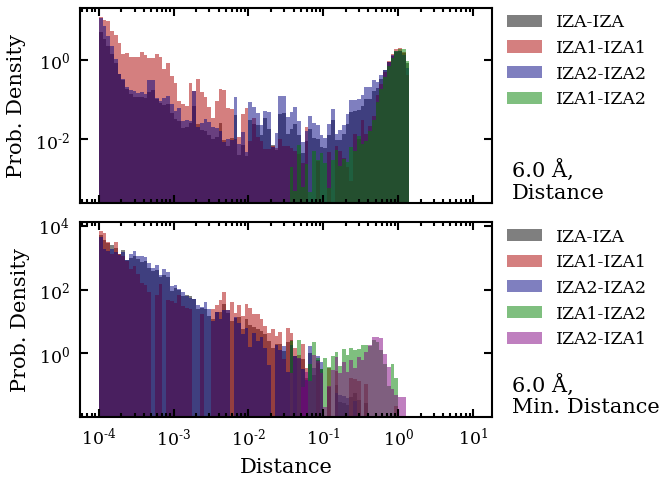

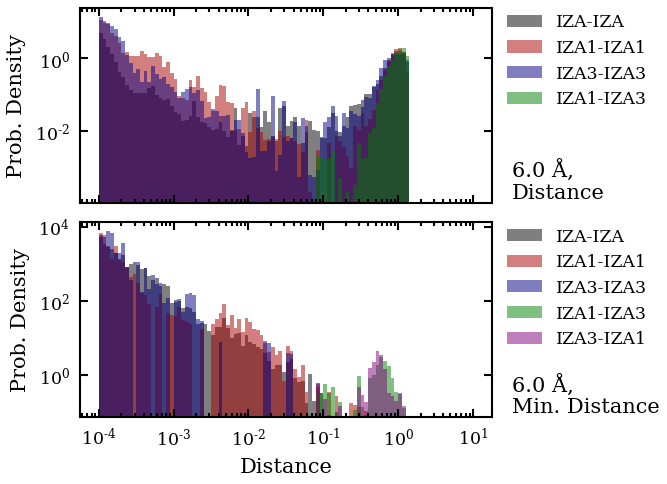

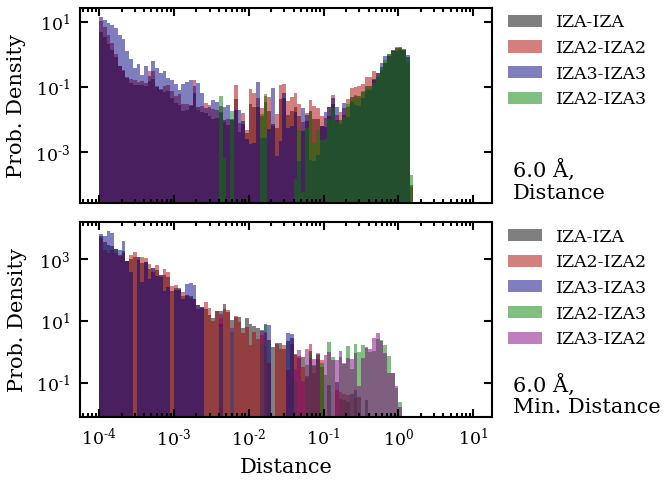

In [97]:
# Load IZA data (all cantons)
iza_iza = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_{plot_type}.dat', dtype=dt)
iza_iza_min = np.loadtxt(f'{data_dir}/IZA_226-IZA_226_min_{plot_type}.dat', dtype=dt)

# Skip canton 4 (RWY) since self-{plot_type} is empty
cantons = np.delete(canton_labels, 3)
for cdx, canton_A in enumerate(cantons):
    
    # Load data from first canton
    iza_A_iza_A = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_A}_{plot_type}.dat', dtype=dt)
    iza_A_iza_A_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_A}_min_{plot_type}.dat', dtype=dt)

    for canton_B in cantons[cdx:]:
        if canton_A == canton_B:
            continue
          
        # Load data from second canton
        iza_B_iza_B = np.loadtxt(f'{data_dir}/IZA_226_{canton_B}-IZA_226_{canton_B}_{plot_type}.dat', dtype=dt)
        iza_B_iza_B_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_B}-IZA_226_{canton_B}_min_{plot_type}.dat', dtype=dt)
    
        iza_A_iza_B = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_B}_{plot_type}.dat', dtype=dt)
        
        iza_A_iza_B_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_A}-IZA_226_{canton_B}_min_{plot_type}.dat', dtype=dt)
        iza_B_iza_A_min = np.loadtxt(f'{data_dir}/IZA_226_{canton_B}-IZA_226_{canton_A}_min_{plot_type}.dat', dtype=dt)

        # Collect data
        dist_data = dict([('IZA-IZA', iza_iza),
                          (f'IZA{canton_A}-IZA{canton_A}', iza_A_iza_A),
                          (f'IZA{canton_B}-IZA{canton_B}', iza_B_iza_B),
                          (f'IZA{canton_A}-IZA{canton_B}', iza_A_iza_B)])

        min_dist_data = dict([('IZA-IZA', iza_iza_min),
                              (f'IZA{canton_A}-IZA{canton_A}', iza_A_iza_A_min),
                              (f'IZA{canton_B}-IZA{canton_B}', iza_B_iza_B_min),
                              (f'IZA{canton_A}-IZA{canton_B}', iza_A_iza_B_min),
                              (f'IZA{canton_B}-IZA{canton_A}', iza_B_iza_A_min)])

        # Plot
        make_histogram(dist_data, min_dist_data, cutoff, plot_type,
                       output=f'../../Results/{cutoff}/IZA_226_{canton_A}-IZA_226_{canton_B}_{plot_type}.pdf')

        plt.show()